### Classification tumor grade

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('meta_tumor_data.csv', index_col=0)

---
### Standardized numeric columns

In [3]:
tumor_df = df[['right_percentage', 'front_percentage', 'up_percentage',
       'tumor_1_percent', 'tumor_2_percent', 'tumor_4_percent', 'tumor_size','Age at MRI']]
scaler = StandardScaler()
standardized_tumor = scaler.fit_transform(tumor_df)

In [4]:
df['standardized_right_percentage'] = standardized_tumor[:,0]
df['standardized_front_percentage'] = standardized_tumor[:,1]
df['standardized_up_percentage'] = standardized_tumor[:,2]
df['standardized_1_percentage'] = standardized_tumor[:,3]
df['standardized_2_percentage'] = standardized_tumor[:,4]
df['standardized_4_percentage'] = standardized_tumor[:,5]
df['standardized_tumor_percentage'] = standardized_tumor[:,6]
df['standardized_age'] = standardized_tumor[:,7]

In [5]:
df.columns

Index(['ID', 'Grade', 'Age at MRI', 'MGMT index', '1-dead 0-alive', 'OS',
       'Sex_F', 'grade_2', 'grade_3', 'grade_4',
       'pathologic diagnosis_Astrocytoma', 'pathologic diagnosis_Glioblastoma',
       'pathologic diagnosis_Oligodendroglioma', 'MGMT status_indeterminate',
       'MGMT status_negative', 'MGMT status_positive', 'MGMT status_nan',
       '1p/19q_co-deletion', '1p/19q_intact', '1p/19q_relative co-deletion',
       '1p/19q_nan', 'IDH_IDH1 p.Arg132His', 'IDH_IDH1 p.R132C',
       'IDH_IDH1 p.R132G', 'IDH_IDH1 p.R132H', 'IDH_IDH1 p.R132S',
       'IDH_IDH2 p.Arg172Trp', 'IDH_IDH2 p.R172K', 'IDH_mutated (NOS)',
       'IDH_wildtype', 'id', 'tumor_1', 'tumor_2', 'tumor_4', 'brain',
       'right_percentage', 'front_percentage', 'up_percentage',
       'tumor_1_percent', 'tumor_2_percent', 'tumor_4_percent', 'tumor_size',
       'standardized_right_percentage', 'standardized_front_percentage',
       'standardized_up_percentage', 'standardized_1_percentage',
       'stan

In [41]:
X = df[['standardized_right_percentage', 'standardized_front_percentage',
       'standardized_up_percentage', 'standardized_1_percentage',
       'standardized_2_percentage', 'standardized_4_percentage', 'standardized_tumor_percentage']]
y = df['Grade']

In [42]:
Counter(y)

Counter({4: 402, 3: 43, 2: 56})

---
#### imblanced data for tumor grade --> oversampling by SMOTE

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=596)

In [44]:
Counter(y_test)

Counter({4: 81, 3: 8, 2: 12})

In [45]:
Counter(y_train)

Counter({4: 321, 3: 35, 2: 44})

In [46]:
oversample = SMOTE(random_state=88)
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [47]:
Counter(y_train)

Counter({4: 321, 3: 321, 2: 321})

---
#### KNN

In [48]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)).fit(X_train, y_train)
print("Train score:",clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 0.9065420560747663
Test score: 0.7128712871287128


In [49]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           2       0.39      0.58      0.47        12
           3       0.24      0.62      0.34         8
           4       0.97      0.74      0.84        81

    accuracy                           0.71       101
   macro avg       0.53      0.65      0.55       101
weighted avg       0.84      0.71      0.76       101



[Text(0, 0.5, 'Grade2'), Text(0, 1.5, 'Grade3'), Text(0, 2.5, 'Grade4')]

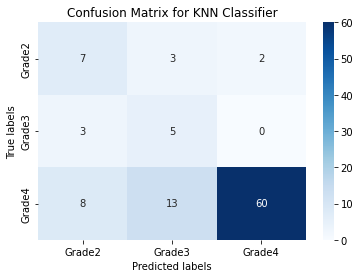

In [50]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), 
            annot = True, ax=ax,
            cmap='Blues')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN Classifier'); 
ax.xaxis.set_ticklabels(['Grade2', 'Grade3', 'Grade4']); ax.yaxis.set_ticklabels(['Grade2', 'Grade3', 'Grade4'])

---
#### Decision Tree

In [51]:
clf = OneVsRestClassifier(DecisionTreeClassifier(max_depth = 3, random_state=1)).fit(X_train, y_train)
print("Train score:",clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))


Train score: 0.8525441329179647
Test score: 0.8217821782178217


In [52]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           2       0.64      0.75      0.69        12
           3       0.21      0.38      0.27         8
           4       0.97      0.88      0.92        81

    accuracy                           0.82       101
   macro avg       0.61      0.67      0.63       101
weighted avg       0.87      0.82      0.84       101



[Text(0, 0.5, 'Grade2'), Text(0, 1.5, 'Grade3'), Text(0, 2.5, 'Grade4')]

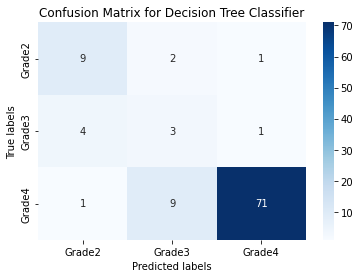

In [53]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), 
            annot = True, ax=ax,
            cmap='Blues')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Decision Tree Classifier'); 
ax.xaxis.set_ticklabels(['Grade2', 'Grade3', 'Grade4']); ax.yaxis.set_ticklabels(['Grade2', 'Grade3', 'Grade4'])

----
#### Random forest

In [54]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=1)).fit(X_train, y_train)
print("Train score:",clf.score(X_train, y_train))
print("Test score:", clf.score(X_test, y_test))

Train score: 1.0
Test score: 0.8613861386138614


In [55]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           2       0.64      0.58      0.61        12
           3       0.27      0.38      0.32         8
           4       0.97      0.95      0.96        81

    accuracy                           0.86       101
   macro avg       0.63      0.64      0.63       101
weighted avg       0.88      0.86      0.87       101



[Text(0, 0.5, 'Grade2'), Text(0, 1.5, 'Grade3'), Text(0, 2.5, 'Grade4')]

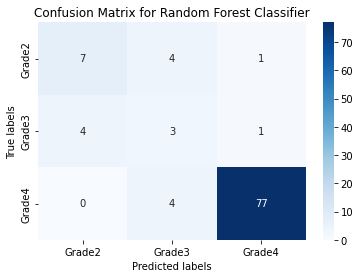

In [56]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), 
            annot = True, ax=ax,
            cmap='Blues')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest Classifier'); 
ax.xaxis.set_ticklabels(['Grade2', 'Grade3', 'Grade4']); ax.yaxis.set_ticklabels(['Grade2', 'Grade3', 'Grade4'])